In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_excel('datasets/fruit_data.xlsx')
df.head()

,width,height,mass,color_score,fruit_name
0,8.4,7.3,192,0.55,apple
1,6.2,4.7,86,0.80,mandarin
2,6.0,4.6,84,0.79,mandarin
3,8.0,6.8,180,0.59,apple
4,7.4,7.2,176,0.60,apple


In [7]:
df.tail()

,width,height,mass,color_score,fruit_name
54,6.5,8.5,152,0.72,lemon
55,6.1,8.1,118,0.70,lemon
56,7.6,8.2,180,0.79,orange
57,7.2,7.2,154,0.82,orange
58,7.2,10.3,194,0.70,lemon


In [9]:
x = df[['width','height','mass','color_score']]
y = df['fruit_name']

print(x.shape)
print(y.shape)

(59, 4)
(59,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

print(x_train.shape) #75%
print(y_train.shape) #25#

(44, 4)
(44,)


In [12]:
# Standard Scale
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)
print(x_test)


[[ 1.51913310e-01  1.17500985e+00  4.94028378e-01 -5.49599730e-01]
 [-1.33346127e+00 -9.50875020e-02 -8.38377406e-01 -5.49599730e-01]
 [-1.58102370e+00 -2.70999381e+00 -1.59975214e+00  6.66274533e-01]
 [ 6.47038170e-01 -2.44510719e-01 -1.53140145e-01 -9.54891151e-01]
 [ 1.51913310e-01 -4.68645545e-01  7.52722748e-02  5.31177393e-01]
 [-1.45724249e+00  2.78470541e-01 -8.00308669e-01 -5.49599730e-01]
 [-9.56491208e-02 -1.69799111e-01 -8.65198561e-04  6.66274533e-01]
 [ 2.75694525e-01 -2.44510719e-01 -1.15071409e-01  3.96080252e-01]
 [ 6.47038170e-01  4.27893759e-01  3.79822168e-01  3.96080252e-01]
 [ 5.23256955e-01 -3.93933937e-01  3.72035381e-02  9.36468814e-01]
 [-1.20968006e+00  3.53182150e-01 -8.00308669e-01 -8.19794011e-01]
 [ 5.23256955e-01  1.17500985e+00  8.36647008e-01  1.25885972e-01]
 [ 7.70819385e-01 -3.93933937e-01 -7.70026719e-02 -9.54891151e-01]
 [-1.58102370e+00 -2.48585898e+00 -1.52361467e+00  1.25885972e-01]
 [ 8.94600601e-01  2.78470541e-01  9.50853218e-01  8.01371673e

In [13]:
k = 3

model = KNeighborsClassifier(n_neighbors=k)

In [14]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
x_pred = [[7.5, 7.5, 175, 0.75]]
x_pred_scale = scaler.transform(x_pred)
y_pred = model.predict(x_pred_scale)

w = x_pred[0][0]
h = x_pred[0][1]
m = x_pred[0][2]
c = x_pred[0][3]
f = y_pred[0]

print('k =',k)
print('Prediction:')
print(f'width: {w}, height:, {h}, mass: {m}, color_score: {c} => fruit: {f}')

k = 3
Prediction:
width: 7.5, height:, 7.5, mass: 175, color_score: 0.75 => fruit: orange


d:\เรียน Machine Learning - IT_Genius\01\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
print('Accuracy:','{:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.93


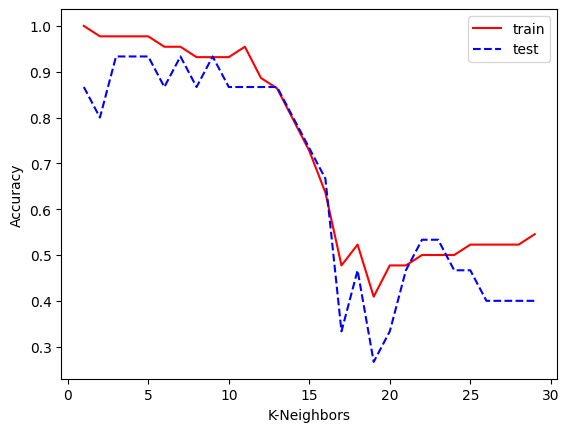

In [28]:
acc_train = []
acc_test = []
n_neighbors = range(1,30)

for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train,y_train))
    acc_test.append(model.score(x_test,y_test))

plt.plot(n_neighbors, acc_train , 'r-', label='train')
plt.plot(n_neighbors, acc_test , 'b--', label='test')

plt.xlabel('K-Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()